Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0890 - val_loss: 0.0046
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7738e-04 - val_loss: 4.8274e-05
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0522e-05 - val_loss: 6.1736e-05
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5855e-06 - val_loss: 3.9351e-05
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8111e-06 - val_loss: 3.9102e-05
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6345e-06 - val_loss: 3.9704e-05
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6064e-06 - val_loss: 4.0613e-05
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7107e-06 - val_loss: 4.0038e-05
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6543e-06 - val_loss: 3.8435e-05
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3814e-06 - val_loss: 3.6710e-05
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3630e-06 - val_loss: 4.0761e-05

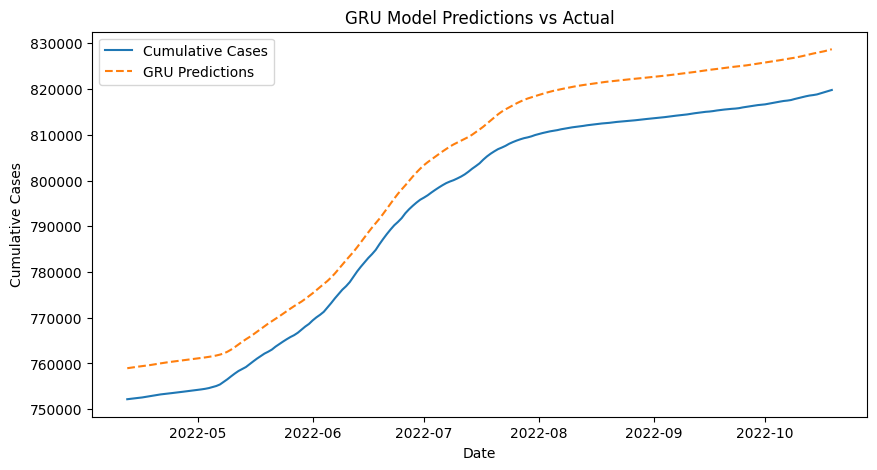

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 2]]
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    GRU(64, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


y_pred = model.predict(X_test)


y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)


mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

test_dates = df.index[split + SEQ_LENGTH:]


plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test_actual, label='Cumulative Cases')
plt.plot(test_dates, y_pred_actual, label='GRU Predictions', linestyle='--')
plt.title("GRU Model Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.savefig("GRU_CumulativeCases.pdf", format="pdf", bbox_inches="tight")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4121 - val_loss: 0.1517
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0219 - val_loss: 0.0010
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0180e-04 - val_loss: 3.9905e-04
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.2013e-05 - val_loss: 8.6730e-05
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0607e-05 - val_loss: 9.3199e-05
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3503e-05 - val_loss: 6.3585e-05
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1473e-05 - val_loss: 5.0462e-06
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0036e-05 - val_loss: 1.2146e-05
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.7639e-06 - val_loss: 1.9199e-05
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0500e-05 - val_loss: 2.4806e-05
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1726e-05 - val_loss: 2.8262e-05
Epoch 12/

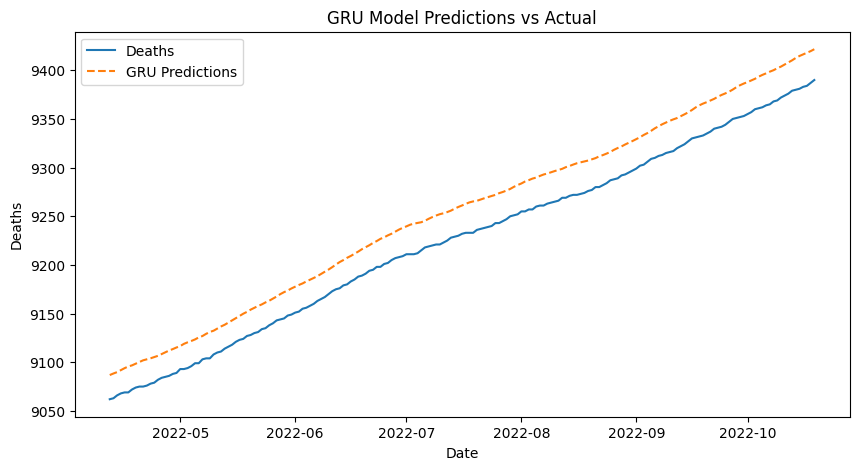

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 3]]
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    GRU(64, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


y_pred = model.predict(X_test)


y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)


mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

test_dates = df.index[split + SEQ_LENGTH:]


plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test_actual, label='Deaths')
plt.plot(test_dates, y_pred_actual, label='GRU Predictions', linestyle='--')
plt.title("GRU Model Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0939 - val_loss: 0.0067
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 2.8740e-04
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5616e-05 - val_loss: 8.9609e-05
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0902e-05 - val_loss: 5.2304e-05
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5822e-06 - val_loss: 5.1953e-05
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5098e-06 - val_loss: 5.3935e-05
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.2195e-06 - val_loss: 5.0557e-05
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9473e-06 - val_loss: 4.7880e-05
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6079e-06 - val_loss: 4.6133e-05
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1911e-06 - val_loss: 5.0495e-05
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9619e-06 - val_loss: 4.6456e-05
Epoch 12

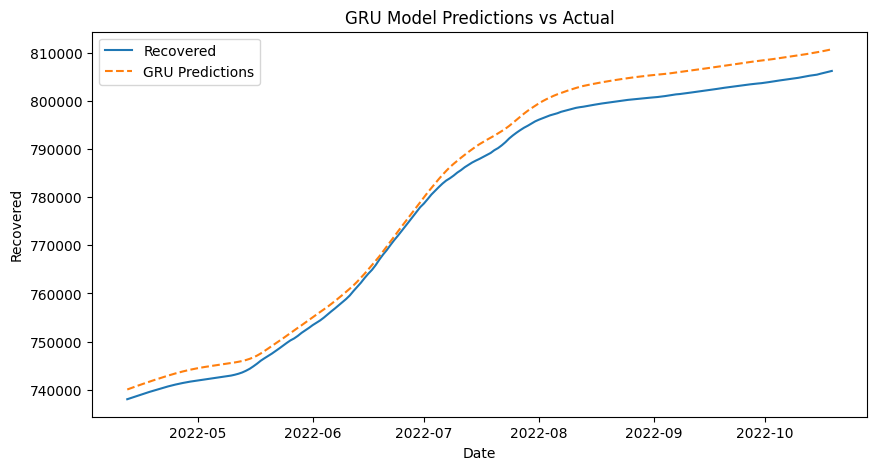

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 4]]
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    GRU(64, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


y_pred = model.predict(X_test)


y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)


mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

test_dates = df.index[split + SEQ_LENGTH:]


plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test_actual, label='Recovered')
plt.plot(test_dates, y_pred_actual, label='GRU Predictions', linestyle='--')
plt.title("GRU Model Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Recovered")
plt.legend()
plt.savefig("GRU_Recovered.pdf", format="pdf", bbox_inches="tight")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0580 - val_loss: 0.0090
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3892e-04 - val_loss: 0.0013
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3317e-04 - val_loss: 0.0012
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1107e-04 - val_loss: 0.0011
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5311e-04 - val_loss: 0.0010
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4342e-04 - val_loss: 9.8268e-04
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0666e-04 - val_loss: 9.6671e-04
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3449e-04 - val_loss: 7.8606e-04
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7433e-04 - val_loss: 7.2238e-04
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8606e-04 - val_loss: 5.9686e-04
Epoch 12/30
38/38 ━━━━━━━━━━

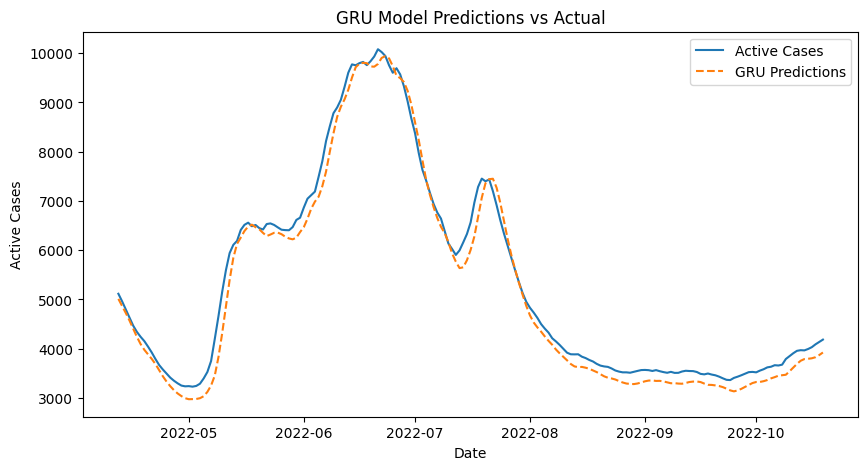

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 5]]
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    GRU(64, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


y_pred = model.predict(X_test)


y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)


mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


test_dates = df.index[split + SEQ_LENGTH:]


plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test_actual, label='Active Cases')
plt.plot(test_dates, y_pred_actual, label='GRU Predictions', linestyle='--')
plt.title("GRU Model Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.savefig("GRU_ActiveCases.pdf", format="pdf", bbox_inches="tight")
plt.show()